In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['NAME', 'CATEGORY', 'ILLUSTRATION'], engine='python')

In [3]:
print(train_data.describe())

                                  NAME CATEGORY  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                             ILLUSTRATION  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          54214 non-null  object
 1   CATEGORY      54214 non-null  object
 2   ILLUSTRATION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [5]:
print(train_data.isnull().sum())

NAME            0
CATEGORY        0
ILLUSTRATION    0
dtype: int64


In [6]:
# TEST DATA WILL BE LOADED
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['SERIAL NO', 'NAME', 'ILLUSTRATION'], engine='python')
test_data.head()

,SERIAL NO,NAME,ILLUSTRATION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


C:\Users\PRADNYA\AppData\Local\Temp\ipykernel_24664\3605300638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='CATEGORY', order=train_data['CATEGORY'].value_counts().index, palette='viridis')
C:\Users\PRADNYA\AppData\Local\Temp\ipykernel_24664\3605300638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


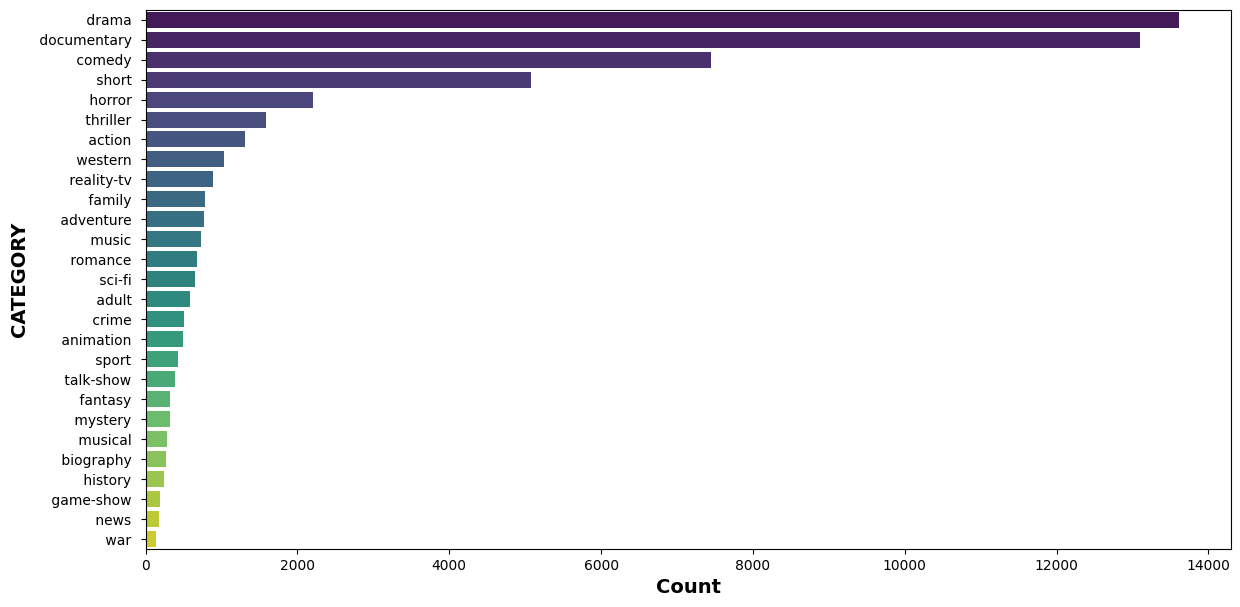

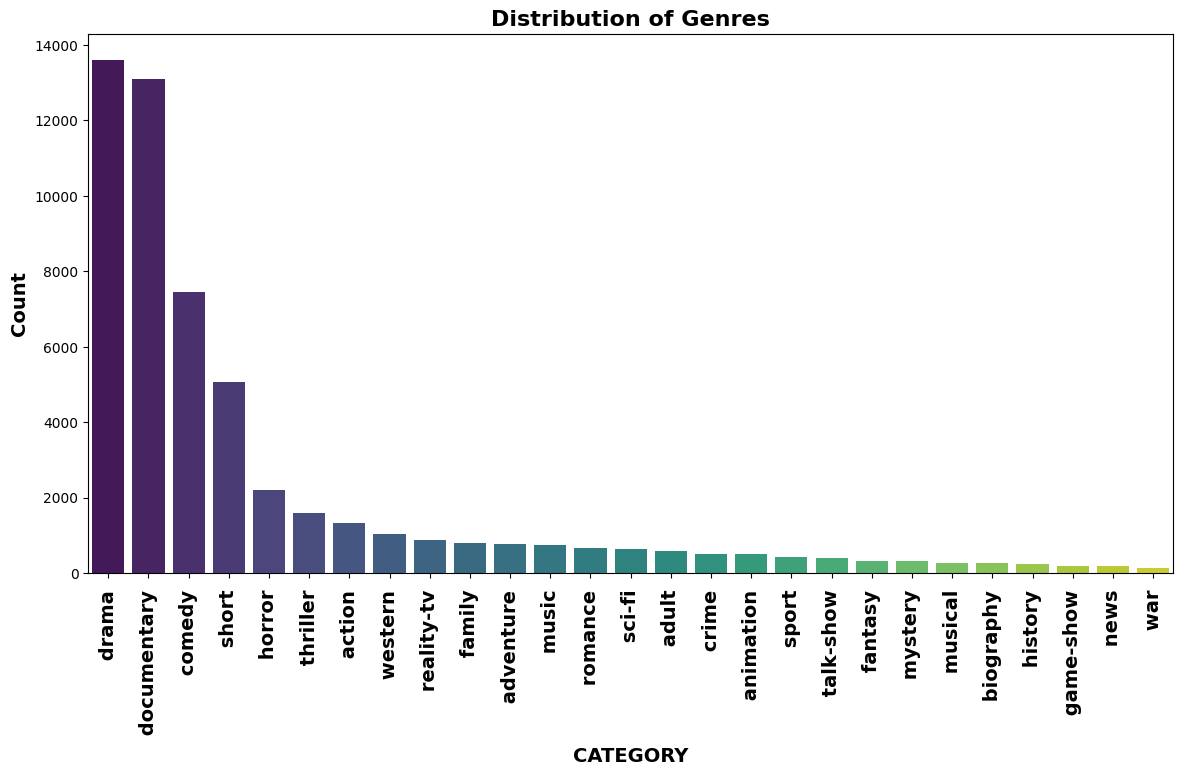

In [7]:
#TRAINING DATA GENRES DISTRIBUTION
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='CATEGORY', order=train_data['CATEGORY'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('CATEGORY', fontsize=14, fontweight='bold')

# GENRES DISTRIBUTION IN GRAPH FORMAT
plt.figure(figsize=(14, 7))
counts = train_data['CATEGORY'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('CATEGORY', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [8]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

#clean_text function
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'@\S+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  
    return text
    
#ILLUSTRATION IN TRAINING DATA AND TEST DATA USING USING clean_text function
train_data['Text_cleaning'] = train_data['ILLUSTRATION'].apply(clean_text)
test_data['Text_cleaning'] = test_data['ILLUSTRATION'].apply(clean_text)

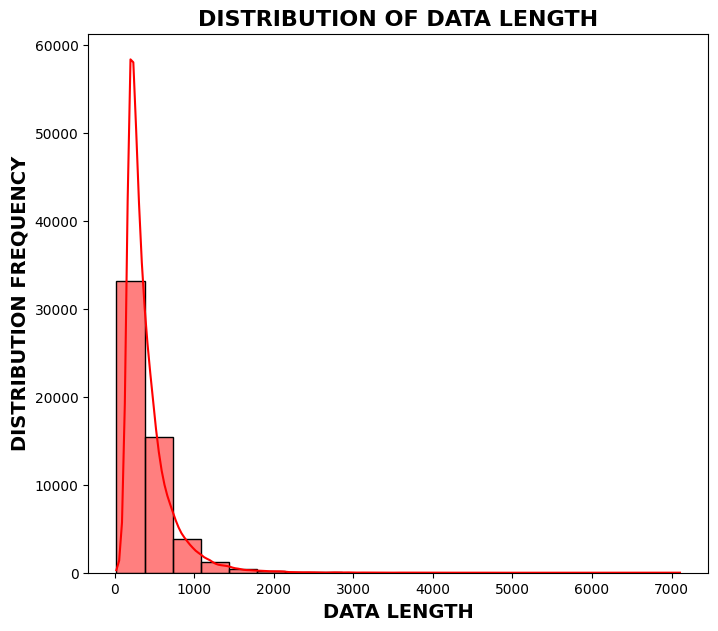

In [9]:

train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)


plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='red')
plt.xlabel('DATA LENGTH', fontsize=14, fontweight='bold')
plt.ylabel('DISTRIBUTION FREQUENCY', fontsize=14, fontweight='bold')
plt.title('DISTRIBUTION OF DATA LENGTH', fontsize=16, fontweight='bold')
plt.show()

In [10]:
#TF-IDF VECTORIZER
tfidf_vectorizer = TfidfVectorizer()

#TRANSFORM THE TRAINING DATA
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

#TRANSFORM THE TESTING DATA
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [11]:
#SPLITING THE DATA
X = X_train
y = train_data['CATEGORY']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#MULTINOMIAL NAIVE BAYES CLASSIFIER
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

#PREDICTION ON  THE VALIDATION SET
y_pred = classifier.predict(X_val)

#EVALUATION
accuracy = accuracy_score(y_val, y_pred)
print("Substantiate Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Substantiate Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0

C:\Users\PRADNYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRADNYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRADNYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av